### Notebook to plot the reconstructed spectrum for data and MC

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import plotting_functions
import importlib
def get_charge(filepath):
    f = h5py.File(filepath, 'r')
    return np.array(f['clusters']['q'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
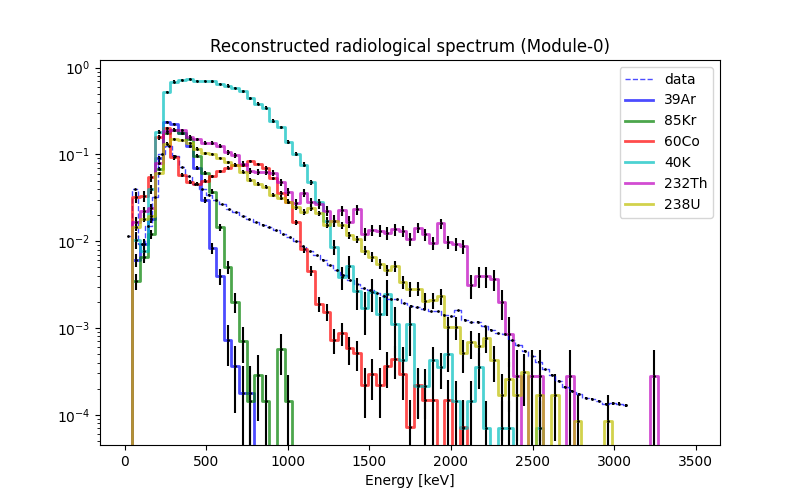

In [2]:
importlib.reload(plotting_functions)
%matplotlib widget
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, figsize=(8,5))

# general parameters
do_calibration = True
normalization = 'area'
nbins = 150
recomb_filename = '/sdf/home/s/sfogarty/Desktop/RadDecay/39Ar_reco_sim/sim/larnd-sim/NEST/NEST_R-values_efield500_1keV_to_10000keV_1keV-stepsize_1000-events.h5'

# plot data histogram
folder_data = '/sdf/group/neutrino/sfogarty/ND_prototype_files/charge_data/module-0/light_study/'
charge_data = get_charge(folder_data + 'datalog_2021_04_04_16_59_17_CEST_events_charge_all.h5')
bincenters_data, y_norm_data, y_norm_std_data = \
        plotting_functions.get_hist_data(charge_data, bins=nbins, data_type='data', \
        calibrate=do_calibration, norm=normalization,recomb_filename=recomb_filename)
plotting_functions.plot_hist(bincenters_data, y_norm_data, y_norm_std_data, axes, color='b', linewidth=1, label='data',linestyle='--')

# number of files for each decay. Assuming they all have the same number of events
nFiles_dict = {
    '39Ar_betas': 2,
    '85Kr_betas': 2,
    '40K_betas': 2,
    '40K_gammas': 2,
    '60Co_betas': 2,
    '60Co_gammas': 2,
    '232Th_betas': 1,
    '232Th_gammas': 1,
    '238U_betas': 2,
    '238U_gammas': 2
}

# Colors for each isotope
colors = {
    '39Ar_betas': 'b',
    '85Kr_betas': 'g',
    '60Co': 'r',
    '40K': 'c',
    '232Th': 'm',
    '238U': 'y'
}

folders_MC = {
    '39Ar_betas': '/sdf/group/neutrino/sfogarty/ND_prototype_files/MC/module-0/reco/radiologicals_run0/reco_matchedGain/',
    '85Kr_betas': '/sdf/group/neutrino/sfogarty/ND_prototype_files/MC/module-0/reco/radiologicals_run0/reco_matchedGain/',
    '40K_betas': '/sdf/group/neutrino/sfogarty/ND_prototype_files/MC/module-0/reco/radiologicals_run0/reco_matchedGain/',
    '40K_gammas': '/sdf/group/neutrino/sfogarty/ND_prototype_files/MC/module-0/reco/radiologicals_run0/reco_matchedGain/',
    '60Co_betas': '/sdf/group/neutrino/sfogarty/ND_prototype_files/MC/module-0/reco/radiologicals_run0/reco_matchedGain/',
    '60Co_gammas': '/sdf/group/neutrino/sfogarty/ND_prototype_files/MC/module-0/reco/radiologicals_run0/reco_matchedGain/',
    '232Th_betas': '/sdf/group/neutrino/sfogarty/ND_prototype_files/MC/module-0/reco/radiologicals_run0/reco_matchedGain/',
    '232Th_gammas': '/sdf/group/neutrino/sfogarty/ND_prototype_files/MC/module-0/reco/radiologicals_run0/reco_matchedGain/',
    '238U_betas': '/sdf/group/neutrino/sfogarty/ND_prototype_files/MC/module-0/reco/radiologicals_run0/reco_matchedGain/',
    '238U_gammas': '/sdf/group/neutrino/sfogarty/ND_prototype_files/MC/module-0/reco/radiologicals_run0/reco_matchedGain/'
}
filename_ending_MC = {
    '39Ar_betas': 'events',
    '85Kr_betas': 'events',
    '40K_betas': 'events',
    '40K_gammas': 'events',
    '60Co_betas': 'events',
    '60Co_gammas': 'events',
    '232Th_betas': 'events',
    '232Th_gammas': 'events',
    '238U_betas': 'events',
    '238U_gammas': 'events'
}
charge_dict, hist_data_dict = plotting_functions.get_charge_MC(nFiles_dict, folders_MC, filename_ending_MC, nbins, do_calibration, normalization, recomb_filename)
plotting_functions.plot_isotopes(hist_data_dict, axes, colors, linewidth=2)

if do_calibration:
    axes.set_xlabel('Energy [keV]')
else:
    axes.set_xlabel('Charge [ke-]')
axes.set_yscale('log')
axes.set_title('Reconstructed radiological spectrum (Module-0)')
axes.legend()
plt.show()